## Семинар 1 Индекс

## Intro

### чтение файла 
- конструкция __with open__ (recommended)
- конструкция __open + close__

In [ ]:
fpath = 'fpath.txt'

# одним массивом  
with open(fpath, 'r') as f:  
    text = f.read() 

#по строкам, в конце каждой строки \n  
with open(fpath, 'r') as f:   
    text = f.readlines() 

#по строкам, без \n   
with open(fpath, 'r') as f:   
    text = f.read().splitlines() 
    
#not reccomended  
file = open(txt_fpath, 'r')  
text = file.read()    
file.close() 

### работа с файлами и папками

### os.path  
путь до файла

In [ ]:
import os

# возвращает полный путь до папки/файла по имени файла / папки
print(os.path.abspath('fpath.txt'))

# возвращает имя файла / папки по полному пути до него
print(os.path.basename('/your/path/to/folder/with/fpath.txt'))

# проверить существование директории - True / False
print(os.path.exists('your/path/to/any/folder/'))

### os.listdir  
возвращает список файлов в данной директории

In [ ]:
main_dir = '/your/path/to/folder/with/folders/'
os.listdir(main_dir)

сделаем пути абсолютными, чтобы наш код не зависел от того, где лежит этот файл

In [ ]:
[main_dir + fpath for fpath in os.listdir(main_dir)]

не забывайте исключать системные директории, такие как .DS_Store

In [ ]:
[main_dir + fpath for fpath in os.listdir(main_dir) if not '.DS_Store' in fpath]

### os.walk
root - начальная директория  
dirs - список поддиректорий (папок)   
files - список файлов в этих поддиректориях  

In [ ]:
main_dir = '/your/path/to/folder/with/folders/'

for root, dirs, files in os.walk(main_dir):
    for name in files:
        print(os.path.join(root, name))

> __os.walk__ возвращает генератор, это значит, что получить его элементы можно только проитерировавшись по нему  
но его легко можно превратить в list и увидеть все его значения

In [ ]:
list(os.walk(main_dir))

##  Обратный индекс 

Сам по себе обратный индекс не может осуществлять поиск, для этого необходимо добавить к нему определенную метрику. Это не совсем очевидная задача, поэтому немного отложим ее. А сейчас посмотрим, что полезного можно вытащить из индекса.    
По сути, индекс - это информация о частоте встречаемости слова в каждом документе.   
Из этого можно понять, например:
1. какое слово является самым часто употребимым / редким
2. какие слова встречаются всегда вместе. Так можно парсить твиттер, fb, форумы и отлавливать новые устойчивые выражения в речи
3. какой документ является самым большим / маленьким (очень изощренный способ, когда есть _len_)

### __Задача__: 
получите обратный индекс для коллекция документов.    
Перед этим постройте матрицу терм-документ и сделайте функцию булева поиска, которая по запросу будет возвращать 5 релевантных документов.   
В качестве коллекции возьмите сценарий сезонов сериала Друзья. Одна серия - один документ.

[download_friends_corpus](https://yadi.sk/d/k_M7n63A3adGSz)

Этапы:   
    1. получить коллекцию документов
    2. для каждого файла коллекции сделать необходимую на ваш взгляд предобработку
    3. получить матрицу терм-документ, написать функцию поиска по ней
    4. получить обратный индекс в виде словаря, где ключ - нормализованное слово, 
    значение - список файлов, в которых это слово встречается
    5. вывести кусочек индекса в виде таблицы 
    6. сделать анализ обратного индекса. Это задание принимается в виде кода и ответов на вопросы

![](Friends/wedding.png)

Напоминание:    
> При итерации по списку вы можете помимо самого элемента получить его порядковый номер    
``` for i, element in enumerate(your_list): ...  ```    
Иногда для получения элемента делают так -  ``` your_list[i] ```, старайтесь этого избегать

In [1]:
import os
import pandas as pd

In [2]:
main_dir = '/Users/irene/Downloads/IR/Friends'
files_list = []

### пройдитесь по всем папкам коллекции и соберите все пути .txt файлов
### _check : в коллекции должно быть 165 файлов

In [3]:
for root, dirs, files in os.walk(main_dir):
    for name in files:
        if not '.DS_Store' in name:
            files_list.append(os.path.join(root, name))

In [4]:
len(files_list)

165

In [5]:
from pymystem3 import Mystem
m = Mystem()
import re
import string

In [6]:
def clean(text):
    text = re.sub('(www|http)\S+', ' ', text)# чистит от ссылок
    text = re.sub('\n', ' ', text)
    text = re.sub('[^\w\s]', ' ', text)
    text = re.sub('[0-9]', ' ', text)
    text = re.sub(' +', ' ', text)
    return text

In [44]:
def lemmatize(text):
    lemmas = m.lemmatize(text)
    #text = re.sub(' +', ' ', "".join(lemmas))
    return ' '.join([x for x in lemmas if x != ' '])

In [45]:
from tqdm import tqdm

In [46]:
lemmatized_texts = []
for each_f in tqdm(files_list):
    with open(each_f, 'r') as f:  
        text = f.read()
        lemmatized = lemmatize(clean(text))
        lemmatized_texts.append(lemmatized)

100%|██████████| 165/165 [00:22<00:00,  7.41it/s]


In [132]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(lemmatized_texts)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
words = list(vec.get_feature_names())

### Создаем датафрейм

In [52]:
df.head()

,after,again,ahh,all,and,are,au,ban,bay,behind,...,ярмарка,ярость,ясмин,ясно,ясность,ясный,яхта,ящерица,ящик,ящичек
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df.shape

(165, 14110)

In [54]:
import numpy as np

In [55]:
from luqum.parser import *

In [66]:
def operations(tree):
    if isinstance(tree, Group):
        return operations(tree.children[0])
    elif hasattr(tree, 'op'):
        if tree.op == 'AND':
            res = set(range(len(df['росс'])))
            for el in tree.children:
                f = operations(el)
                res = res & f
            print('RES', res)
            return res
        elif tree.op == 'OR':# ИЛИ
            res = set(range(len(df['росс'])))
            for el in tree.children:
                f = operations(el)
                res = res | f
            print('RES', res)
            return res
        elif tree.op == 'NOT ':
            word = lemmatize(tree.children[0].value.lower())
            res = set(range(len(df['росс']))) - set(np.where(df[word[0]] > 0)[0])
            print('RES', res)
            return res
    elif isinstance(tree, Word):
        word = lemmatize(tree.value.lower()).strip()
        #print(word)
        if word in words:
            return set(np.where(df[word] > 0)[0])
        else:
            #print(word, 'нет в словаре')
            return set()

In [67]:
boolean_search('Моника & Фиби & Рэйчел & Чендлер & Джои & Росс')

Моника AND Фиби AND Рэйчел AND Чендлер AND Джои AND Росс
моника
фиби
рэйчел
чендлер
джой
росс
RES {0, 3, 6, 8, 13, 21, 53}


['1x01', '1x04', '1x07', '1x09', '1x14']

In [19]:
input_text = [
    'Моника & Фиби & Рэйчел & Чендлер & Джои & Росс',
    '(Моника ИЛИ Фиби) & Рэйчел & (Чендлер ИЛИ Джои) & Росс', 
    '(НЕ Моника) & Фиби & Рэйчел & Чендлер & Джои & (НЕ Росс)'
]

In [20]:
def boolean_search(search) -> list:
    """
    Produces a Boolean search according with the term-document matrix
    :return: list of first 5 relevant documents
    """
    search = search.replace('&','AND').replace('НЕ','NOT').replace('ИЛИ','OR')
    tree = parser.parse(search)
    print(tree)
    try:
        return [re.search('([0-9]+x[0-9]+)', files_list[element]).group(1) for element in list(operations(tree))[0:5]]
    except:
        return [re.search('([0-9]+x[0-9]+)', files_list[element]).group(1) for element in list(operations(tree))]

In [ ]:
for search in input_text:
    print(boolean_search(search))

Совет для построения обратного индекса: 
> В качестве словаря используйте ``` defaultdict ``` из модуля collections   
Так можно избежать конструкции ``` dict.setdefault(key, default=None) ```

In [74]:
def inverted_index(df) -> dict:
    """
    Create inverted index by input doc collection
    :return: inverted index
    """
    #d = {}
    files = []
    for word in df:
        files.append(np.where(df[word] > 0)[0])
    index = pd.DataFrame(data={'Слово': words, 'Серии': files})
    return index

In [76]:
index = inverted_index(df)

In [77]:
index.head()

,Серии,Слово
0,[149],after
1,[110],again
2,[93],ahh
3,"[109, 116]",all
4,"[67, 134]",and


In [79]:
df.head()

,after,again,ahh,all,and,are,au,ban,bay,behind,...,ярмарка,ярость,ясмин,ясно,ясность,ясный,яхта,ящерица,ящик,ящичек
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
index = df.T

In [82]:
index.head()

,0,1,2,3,4,5,6,7,8,9,...,155,156,157,158,159,160,161,162,163,164
after,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
again,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ahh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
all,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
and,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### какое слово является самым частотным?

In [110]:
d = {}
for word in df:
    frq = sum(df[word])
    d[word] = frq

In [111]:
import operator
sorted_d = sorted(d.items(), key=operator.itemgetter(1))

In [114]:
sorted_d[-1]
print('Самое частотное слово - "', sorted_d[-1][0], '"(', sorted_d[-1][1], 'вхождений )')

Самое частотное слово - " ты "( 11194 вхождений )


### какое самым редким?

In [116]:
print('Одно из самых редких слов "', sorted_d[0][0], '"(', sorted_d[0][1], 'вхождений )')

Одно из самых редких слов " after "( 1 вхождений )


### какой набор слов есть во всех документах коллекции?

In [119]:
list_w = []
for word in df:
    if len(np.where(df[word] > 0)[0]) == 165:
        list_w.append(word)
print(', '.join(list_w))

быть, весь, все, да, давать, думать, если, еще, знать, как, мой, мочь, мы, на, не, нет, но, ну, он, она, они, просто, сказать, так, такой, то, ты, хорошо, хотеть, что, это, этот


### какой сезон был самым популярным у Чендлера? у Моники?

In [161]:
seasons = [re.search('([0-9]+)x[0-9]+', el).group(1) for el in files_list]
from itertools import groupby
df['№ сезона'] = seasons
df[['чендлер', '№ сезона', 'моника']].groupby(['№ сезона']).sum()

,чендлер,моника
№ сезона,,
1,57,57
2,53,78
3,77,70
4,104,73
5,139,131
6,150,126
7,144,159


In [163]:
print('У Чендлера самым популярным сезоном был 6, у Моники - 7')

У Чендлера самым популярным сезоном был 6, у Моники - 7


### кто из главных героев статистически самый популярный?

In [133]:
vals = []
for word in ['моника', 'рэйчел', 'фиби', 'чендлер','росс','джой']:
    vals.append(sum(df[word]))

In [134]:
%matplotlib inline 

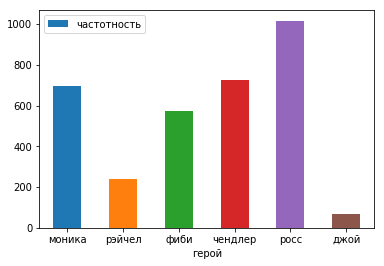

In [136]:
df1 = pd.DataFrame({'герой':['моника', 'рэйчел', 'фиби', 'чендлер','росс','джой'], 'частотность':vals})
df1.plot.bar(x='герой', y='частотность', rot=0)

С помощью обратного индекса произведите следующую аналитику:  

1) общая аналитика
- какое слово является самым частотным?
- какое самым редким?
- какой набор слов есть во всех документах коллекции?

2) частота встречаемости имен главных героев в каждом сезоне      
- какой сезон был самым популярным у Чендлера? у Моники?   
- кто из главных героев статистически самый популярный? 


## Функция ранжирования Okapi BM25

Для обратного индекса есть общепринятая формула для ранжирования *Okapi best match 25* ([Okapi BM25](https://ru.wikipedia.org/wiki/Okapi_BM25)).    
Пусть дан запрос $Q$, содержащий слова  $q_1, ... , q_n$, тогда функция BM25 даёт следующую оценку релевантности документа $D$ запросу $Q$:

$$ score(D, Q) = \sum_{i}^{n} \text{IDF}(q_i)*\frac{(k_1+1)*f(q_i,D)}{f(q_i,D)+k_1(1-b+b\frac{|D|}{avgdl})} $$ 
где   
>$f(q_i,D)$ - частота слова $q_i$ в документе $D$ (TF)       
$|D|$ - длина документа (количество слов в нём)   
*avgdl* — средняя длина документа в коллекции    
$k_1$ и $b$ — свободные коэффициенты, обычно их выбирают как $k_1$=2.0 и $b$=0.75   
$$$$
$\text{IDF}(q_i)$ есть обратная документная частота (IDF) слова $q_i$: 
$$\text{IDF}(q_i) = \log\frac{N-n(q_i)+0.5}{n(q_i)+0.5},$$
>> где $N$ - общее количество документов в коллекции   
$n(q_i)$ — количество документов, содержащих $q_i$

In [260]:
### реализуйте эту функцию ранжирования 
from math import log

k1 = 2.0
b = 0.75
avgdl = round(sum([len(el) for el in files_list])/len(files_list))
N = len(files_list)

def score_BM25(qf, dl, avgdl, k1, b, N, n) -> float:
    """
    Compute similarity score between search query and documents from collection
    :return: score
    """
    score = math.log((N-n+0.5)/(n+0.5)) * (k1+1)*qf/(qf+k1*(1-b+b*(dl/avgdl)))
    return score

In [261]:
import math

### __Задача__:    
напишите функцию, которая сортирует поисковую выдачу для любого входящего запроса согласно метрике *Okapi BM25*.    
Выведите 10 первых результатов и их скор по запросу **рождественские каникулы**. 

In [262]:
def compute_sim(lemma, inverted_index) -> float:
    """
    Compute similarity score between word in search query and all document  from collection
    :return: score
    """
    doc_list = df[lemma]
    n = len(np.where(df[word] > 0)[0])
    relevance_dict = []
    for i, doc in enumerate(doc_list):
        qf = doc/len(files_list[i])
        dl = len(files_list[i])
        relevance_dict.append(score_BM25(qf, dl, avgdl, k1, b, N, n))
    return relevance_dict

In [263]:
def get_search_result(query) -> list:
    """
    Compute sim score between search query and all documents in collection
    Collect as pair (doc_id, score)
    :param query: input text
    :return: list of lists with (doc_id, score)
    """
    query = lemmatize(query).split()
    res = [0] * len(files_list)
    for word in query:
        relevance_dict = compute_sim(word, inverted_index)
        res = [x + y for x, y in zip(res, relevance_dict)]
    d = {}
    for i, num in enumerate(res):
        d[i] = num
    return sorted(d.items(), key=operator.itemgetter(1), reverse=True)[0:10]

In [271]:
for x in get_search_result('рождественские каникулы'):
    print(re.search('([0-9]+x[0-9].+?).ru', files_list[x[0]]).group(1), x[1])

7x10 - The One With The Holiday Armadillo 0.39286475145086625
6x19 - The One With Joey's Fridge 0.3349870549300526
3x10 - The One Where Rachel Quits 0.2805161268001936
2x09 - The One With Phoebe's Dad 0.17283539922574218
4x03 - The One With The 'Cuffs 0.11981819934653669
1x16 - The One With Two Parts (1) 0.11387103481662725
1x17 - The One With Two Parts (2) 0.11387103481662725
4x10 - The One With The Girl From Poughkeepsie 0.09261545073530975
6x12 - The One With The Joke 0.062359319987906975
6x10 - The One With The Routine 0.059195210728478304
